In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import sklearn.linear_model

In [3]:
X_scaled = pd.read_csv('X_scaled.csv')
X_poly = pd.read_csv('X_poly.csv')
X_binned_all = pd.read_csv('X_binned_all.csv')
X_extended = pd.read_csv('X_extended.csv')
X_rf_features = pd.read_csv('RF_fetures.csv')
X_rf_features_extended = pd.read_csv('RF_fetures_extended.csv')

X_bn = pd.read_csv('BN_features.csv')

y = pd.read_csv('y.csv')

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

mae_scaled  = mean_absolute_error(y_test, y_pred)
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred))
r2_scaled = r2_score(y_test, y_pred)

n = len(y_test)
adj_r2_scaled = 1 - (1 - r2_scaled) * (n - 1) / (n - X_train.shape[1] - 1)

print(f'MAE: {mae_scaled} | RMSE: {rmse_scaled} | R2: {r2_scaled} | Adj R2: {adj_r2_scaled}')

MAE: 24.86392427360354 | RMSE: 108.59035807547468 | R2: -0.00034813616085327403 | Adj R2: -0.15770626993896508


#### X_poly

In [6]:
# without dimension reduction
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

mae_poly  = mean_absolute_error(y_test, y_pred)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred))
r2_poly = r2_score(y_test, y_pred)

n = len(y_test)
adj_r2_poly = 1 - (1 - r2_poly) * (n - 1) / (n - X_train.shape[1] - 1)

print(f'MAE: {mae_poly} | RMSE: {rmse_poly} | R2: {r2_poly} | Adj R2: {adj_r2_poly}')

MAE: 40.42945402291438 | RMSE: 130.18886834715585 | R2: -0.43785913457949177 | Adj R2: 10.256218178855478


In [7]:
from sklearn.decomposition import PCA

PCA: 96.02% explained with 20 components


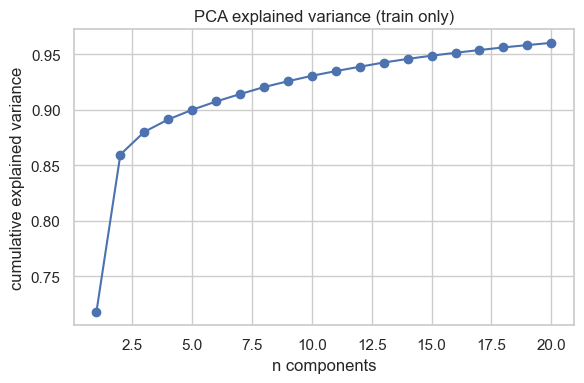

MAE: 26.10593931408041 | RMSE: 109.69107965386463 | R2: -0.020730892973407133 | Adj R2: -0.2666901442923004
Train RMSE: 44.0299  |  Train R2: 0.0678
R2 difference (train-test): 0.0885


In [8]:
# with PCA
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# PCA on train
n_pca = min(20, X_train_raw.shape[1])
pca = PCA(n_components=n_pca, random_state=0)
X_train_pca = pca.fit_transform(X_train_raw)

X_test_pca = pca.transform(X_test_raw)

# explained variance
explained = np.cumsum(pca.explained_variance_ratio_)
print(f"PCA: {explained[-1]:.2%} explained with {n_pca} components")

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, n_pca+1), explained, marker='o')
plt.xlabel('n components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.title('PCA explained variance (train only)')
plt.tight_layout()
plt.show()

# model
linear = LinearRegression()
linear.fit(X_train_pca, y_train)

y_pred = linear.predict(X_test_pca)

mae_poly_pca = mean_absolute_error(y_test, y_pred)
rmse_poly_pca = np.sqrt(mean_squared_error(y_test, y_pred))
r2_poly_pca = r2_score(y_test, y_pred)

n = len(y_test)
adj_r2_poly_pca = 1 - (1 - r2_poly_pca) * (n - 1) / (n - X_train_pca.shape[1] - 1)

print(f'MAE: {mae_poly_pca} | RMSE: {rmse_poly_pca} | R2: {r2_poly_pca} | Adj R2: {adj_r2_poly_pca}')

y_train_pred = linear.predict(X_train_pca)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
print(f'Train RMSE: {train_rmse:.4f}  |  Train R2: {train_r2:.4f}')
print(f'R2 difference (train-test): {train_r2 - r2_poly_pca:.4f}')

#### X_binned_all

In [9]:
# without dimension reduction
X_train, X_test, y_train, y_test = train_test_split(X_binned_all, y, test_size=0.2, random_state=42)

linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

mae_binned_all = mean_absolute_error(y_test, y_pred)
rmse_binned_all = np.sqrt(mean_squared_error(y_test, y_pred))
r2_binned_all = r2_score(y_test, y_pred)

n = len(y_test)
adj_r2_binned_all = 1 - (1 - r2_binned_all) * (n - 1) / (n - X_train.shape[1] - 1)

print(f'MAE: {mae_binned_all} | RMSE: {rmse_binned_all} | R2: {r2_binned_all} | Adj R2: {adj_r2_binned_all}')

MAE: 29.285933950618105 | RMSE: 108.881836215693 | R2: -0.0057256107053911265 | Adj R2: -1.1581195396386517


PCA: 75.23% explained with 20 components


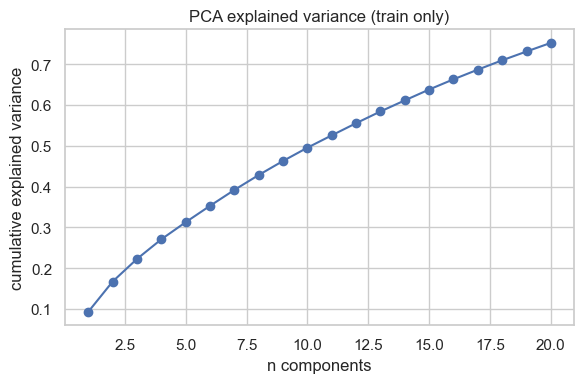

MAE: 25.32177424294238 | RMSE: 108.74667930769081 | R2: -0.003230311177793155 | Adj R2: -0.24497255483509273
Train RMSE: 44.7528  |  Train R2: 0.0369
R2 difference (train-test): 0.0402


In [10]:
# with PCA
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_binned_all, y, test_size=0.2, random_state=42
)

# PCA on train
n_pca = min(20, X_train_raw.shape[1])
pca = PCA(n_components=n_pca, random_state=0)
X_train_pca = pca.fit_transform(X_train_raw)

X_test_pca = pca.transform(X_test_raw)

# explained variance
explained = np.cumsum(pca.explained_variance_ratio_)
print(f"PCA: {explained[-1]:.2%} explained with {n_pca} components")

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, n_pca+1), explained, marker='o')
plt.xlabel('n components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.title('PCA explained variance (train only)')
plt.tight_layout()
plt.show()

# model
linear = LinearRegression()
linear.fit(X_train_pca, y_train)

y_pred = linear.predict(X_test_pca)

mae_binned_all_pca = mean_absolute_error(y_test, y_pred)
rmse_binned_all_pca = np.sqrt(mean_squared_error(y_test, y_pred))
r2_binned_all_pca = r2_score(y_test, y_pred)

n = len(y_test)
adj_r2_binned_all_pca = 1 - (1 - r2_binned_all_pca) * (n - 1) / (n - X_train_pca.shape[1] - 1)

print(f'MAE: {mae_binned_all_pca} | RMSE: {rmse_binned_all_pca} | R2: {r2_binned_all_pca} | Adj R2: {adj_r2_binned_all_pca}')

y_train_pred = linear.predict(X_train_pca)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
print(f'Train RMSE: {train_rmse:.4f}  |  Train R2: {train_r2:.4f}')
print(f'R2 difference (train-test): {train_r2 - r2_binned_all_pca:.4f}')

#### X_extended

In [11]:
# without dimension reduction
X_train, X_test, y_train, y_test = train_test_split(X_extended, y, test_size=0.2, random_state=42)

linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

mae_extended = mean_absolute_error(y_test, y_pred)
rmse_extended = np.sqrt(mean_squared_error(y_test, y_pred))
r2_extended  = r2_score(y_test, y_pred)

n = len(y_test)
adj_r2_extended = 1 - (1 - r2_extended) * (n - 1) / (n - X_train.shape[1] - 1)

print(f'MAE: {mae_extended} | RMSE: {rmse_extended} | R2: {r2_extended} | Adj R2: {adj_r2_extended}')

MAE: 29.212736676955632 | RMSE: 110.33054792747144 | R2: -0.03266673362787764 | Adj R2: -1.7272993221454205


PCA: 85.92% explained with 20 components


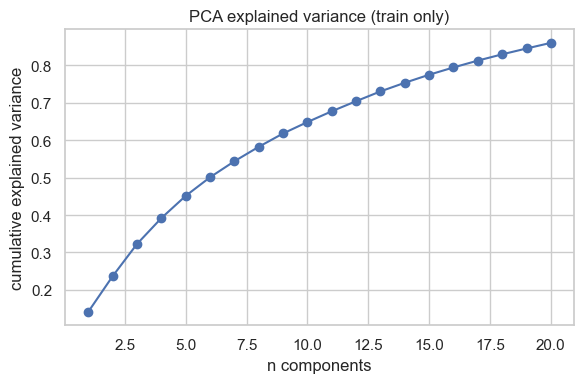

MAE: 26.17292334852676 | RMSE: 109.7333016746409 | R2: -0.021516838659483728 | Adj R2: -0.26766547448104605
Train RMSE: 44.0100  |  Train R2: 0.0687
R2 difference (train-test): 0.0902


In [12]:
# with PCA
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_extended, y, test_size=0.2, random_state=42
)

# PCA on train
n_pca = min(20, X_train_raw.shape[1])
pca = PCA(n_components=n_pca, random_state=0)
X_train_pca = pca.fit_transform(X_train_raw)

X_test_pca = pca.transform(X_test_raw)

# explained variance
explained = np.cumsum(pca.explained_variance_ratio_)
print(f"PCA: {explained[-1]:.2%} explained with {n_pca} components")

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, n_pca+1), explained, marker='o')
plt.xlabel('n components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.title('PCA explained variance (train only)')
plt.tight_layout()
plt.show()

# model
linear = LinearRegression()
linear.fit(X_train_pca, y_train)

y_pred = linear.predict(X_test_pca)

mae_extended_pca = mean_absolute_error(y_test, y_pred)
rmse_extended_pca = np.sqrt(mean_squared_error(y_test, y_pred))
r2_extended_pca = r2_score(y_test, y_pred)

n = len(y_test)
adj_r2_extended_pca = 1 - (1 - r2_extended_pca) * (n - 1) / (n - X_train_pca.shape[1] - 1)

print(f'MAE: {mae_extended_pca} | RMSE: {rmse_extended_pca} | R2: {r2_extended_pca} | Adj R2: {adj_r2_extended_pca}')

y_train_pred = linear.predict(X_train_pca)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
print(f'Train RMSE: {train_rmse:.4f}  |  Train R2: {train_r2:.4f}')
print(f'R2 difference (train-test): {train_r2 - r2_extended_pca:.4f}')

In [13]:
# only important features (with RF importance > 0.05)
# without additional features

X_train, X_test, y_train, y_test = train_test_split(X_rf_features, y, test_size=0.2, random_state=42)

linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

mae_important = mean_absolute_error(y_test, y_pred)
rmse_important = np.sqrt(mean_squared_error(y_test, y_pred))
r2_important = r2_score(y_test, y_pred)

n = len(y_test)
adj_r2_important = 1 - (1 - r2_important) * (n - 1) / (n - X_train.shape[1] - 1)

print(f'MAE: {mae_important} | RMSE: {rmse_important} | R2: {r2_important} | Adj R2: {adj_r2_important}')

MAE: 24.6898939395893 | RMSE: 108.76072023759907 | R2: -0.0034893939553610753 | Adj R2: -0.06556090285981653


In [14]:
# only important features (with RF importance > 0.05)
# with additional features

X_train, X_test, y_train, y_test = train_test_split(X_rf_features_extended, y, test_size=0.2, random_state=42)

linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

mae_important_add = mean_absolute_error(y_test, y_pred)
rmse_important_add = np.sqrt(mean_squared_error(y_test, y_pred))
r2_important_add = r2_score(y_test, y_pred)

n = len(y_test)
adj_r2_important_add = 1 - (1 - r2_important_add) * (n - 1) / (n - X_train.shape[1] - 1)

print(f'MAE: {mae_important_add} | RMSE: {rmse_important_add} | R2: {r2_important_add} | Adj R2: {adj_r2_important_add}')

MAE: 25.847568754317965 | RMSE: 109.93211502282008 | R2: -0.0252217333227438 | Adj R2: -0.04552315378458016


In [15]:
# most important features from bayesian network (with P > 0.1)

bayesian_features = ['day', 'month', 'Y', 'ISI', 'FFMC', 'X', 'temp', 'wind', 'DMC']
X_train, X_test, y_train, y_test = train_test_split(X_bn, y, test_size=0.2, random_state=42)

linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

mae_important_bn = mean_absolute_error(y_test, y_pred)
rmse_important_bn = np.sqrt(mean_squared_error(y_test, y_pred))
r2_important_bn = r2_score(y_test, y_pred)

n = len(y_test)
adj_r2_important_bn = 1 - (1 - r2_important_bn) * (n - 1) / (n - X_train.shape[1] - 1)

print(f'MAE: {mae_important_bn} | RMSE: {rmse_important_bn} | R2: {r2_important_bn} | Adj R2: {adj_r2_important_bn}')

MAE: 24.470102541909174 | RMSE: 108.47058548822407 | R2: 0.0018573673550353886 | Adj R2: -0.09370948045139738


In [16]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [17]:
baseline = pd.read_csv('forestfires.csv')
features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 
            'ISI', 'temp', 'RH', 'wind', 'rain']

X_baseline = baseline[features]
y_baseline = baseline['area']

linear_model_baseline = Pipeline([
    ('regressor', sklearn.linear_model.LinearRegression())
])
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y_baseline, test_size=0.2, random_state=42)

linear_model_baseline.fit(X_train, y_train)
y_pred= linear_model_baseline.predict(X_test)

mae_baseline = mean_absolute_error(y_test, y_pred)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred))
r2_baseline = r2_score(y_test, y_pred)

n = len(y_test)
adj_r2_baseline = 1 - (1 - r2_baseline) * (n - 1) / (n - X_train.shape[1] - 1)


print(f'MAE: {mae_baseline} | RMSE: {rmse_baseline} | R2: {r2_baseline} | Adj R2: {adj_r2_baseline}')

MAE: 24.618101346954038 | RMSE: 108.44326908355774 | R2: 0.0023600333037148147 | Adj R2: -0.10491308139481048


In [18]:
df_univar_area = pd.read_csv('data_univar_area.csv')

features = ['X', 'Y', 'month', 'day', 'FFMC_transformed', 'DMC', 'DC', 
            'ISI_capped', 'temp', 'RH', 'wind', 'rain_sqrt', 'rain_binary']

X_univar_area = df_univar_area[features]
y_univar_area = df_univar_area['area']

# Кодируем категориальные
categorical = ['month', 'day']
numerical = [col for col in features if col not in categorical]


preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical),
    ('num', StandardScaler(), numerical)
])

linear_model_univar_area = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', sklearn.linear_model.LinearRegression())
])
X_train, X_test, y_train, y_test = train_test_split(X_univar_area, y_univar_area, test_size=0.2, random_state=42)

linear_model_univar_area.fit(X_train, y_train)
y_pred = linear_model_univar_area.predict(X_test)

mae_univar_area = mean_absolute_error(y_test, y_pred)
rmse_univar_area = np.sqrt(mean_squared_error(y_test, y_pred))
r2_univar_area = r2_score(y_test, y_pred)

n = len(y_test)
adj_r2_univar_area = 1 - (1 - r2_univar_area) * (n - 1) / (n - X_train.shape[1] - 1)

print(f'MAE: {mae_univar_area} | RMSE: {rmse_univar_area} | R2: {r2_univar_area} | Adj R2: {adj_r2_univar_area}')


MAE: 1.836946292464159 | RMSE: 2.2551257133246754 | R2: 0.0033852319265647024 | Adj R2: -0.18170036785850185


In [19]:
df_univar = pd.read_csv('data_univar.csv')

features = ['X', 'Y', 'month', 'day', 'FFMC_transformed', 'DMC', 'DC', 
            'ISI_capped', 'temp', 'RH', 'wind', 'rain_sqrt', 'rain_binary']

X_univar = df_univar[features]
y_univar= df_univar['area']

# Кодируем категориальные
categorical = ['month', 'day']
numerical = [col for col in features if col not in categorical]


preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical),
    ('num', StandardScaler(), numerical)
])

linear_model_univar = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', sklearn.linear_model.LinearRegression())
])
X_train, X_test, y_train, y_test = train_test_split(X_univar, y_univar, test_size=0.2, random_state=42)

linear_model_univar.fit(X_train, y_train)
y_pred = linear_model_univar.predict(X_test)

mae_univar = mean_absolute_error(y_test, y_pred)
rmse_univar = np.sqrt(mean_squared_error(y_test, y_pred))
r2_univar = r2_score(y_test, y_pred)

n = len(y_test)
adj_r2_univar = 1 - (1 - r2_univar) * (n - 1) / (n - X_train.shape[1] - 1)

print(f'MAE: {mae_univar} | RMSE: {rmse_univar} | R2: {r2_univar} | Adj R2: {adj_r2_univar}')

MAE: 24.695536547676603 | RMSE: 107.79958731866087 | R2: 0.014168176531407894 | Adj R2: -0.12822975352516663


In [20]:
metrics ={
    'MAE': [mae_baseline, mae_univar, mae_univar_area, mae_scaled, mae_poly, mae_poly_pca, mae_binned_all, mae_binned_all_pca, mae_extended, mae_extended_pca, mae_important,
            mae_important_add, mae_important_bn],
    'RMSE': [rmse_baseline, rmse_univar, rmse_univar_area, rmse_scaled, rmse_poly, rmse_poly_pca, rmse_binned_all, rmse_binned_all_pca, rmse_extended, rmse_extended_pca, rmse_important,
             rmse_important_add, rmse_important_bn],
    'R^2': [r2_baseline, r2_univar, r2_univar_area, r2_scaled, r2_poly, r2_poly_pca, r2_binned_all, r2_binned_all_pca, r2_extended, r2_extended_pca, r2_important,
             r2_important_add, r2_important_bn],
    'Adj R^2': [adj_r2_baseline, adj_r2_univar, adj_r2_univar_area, adj_r2_scaled, adj_r2_poly, adj_r2_poly_pca, adj_r2_binned_all, adj_r2_binned_all_pca, adj_r2_extended, adj_r2_extended_pca, adj_r2_important,
             adj_r2_important_add, adj_r2_important_bn]
}
model_names = ['baseline', 'X_univar', 'X_univar_area', 'X_scaled', 'X_poly', 'X_poly_pca', 'X_binned_all', 'X_binned_all_pca', 'X_extended', 'X_extended_pca',
              'X_scaled, RF > 0.05', 'X_extended, RF > 0.05', 'BN top-features']


df_metrics = pd.DataFrame(metrics, index=model_names)
display(df_metrics)

,MAE,RMSE,R^2,Adj R^2
baseline,24.618101,108.443269,0.002360,-0.104913
X_univar,24.695537,107.799587,0.014168,-0.128230
X_univar_area,1.836946,2.255126,0.003385,-0.181700
X_scaled,24.863924,108.590358,-0.000348,-0.157706
X_poly,40.429454,130.188868,-0.437859,10.256218
X_poly_pca,26.105939,109.691080,-0.020731,-0.266690
X_binned_all,29.285934,108.881836,-0.005726,-1.158120
X_binned_all_pca,25.321774,108.746679,-0.003230,-0.244973
X_extended,29.212737,110.330548,-0.032667,-1.727299
X_extended_pca,26.172923,109.733302,-0.021517,-0.267665


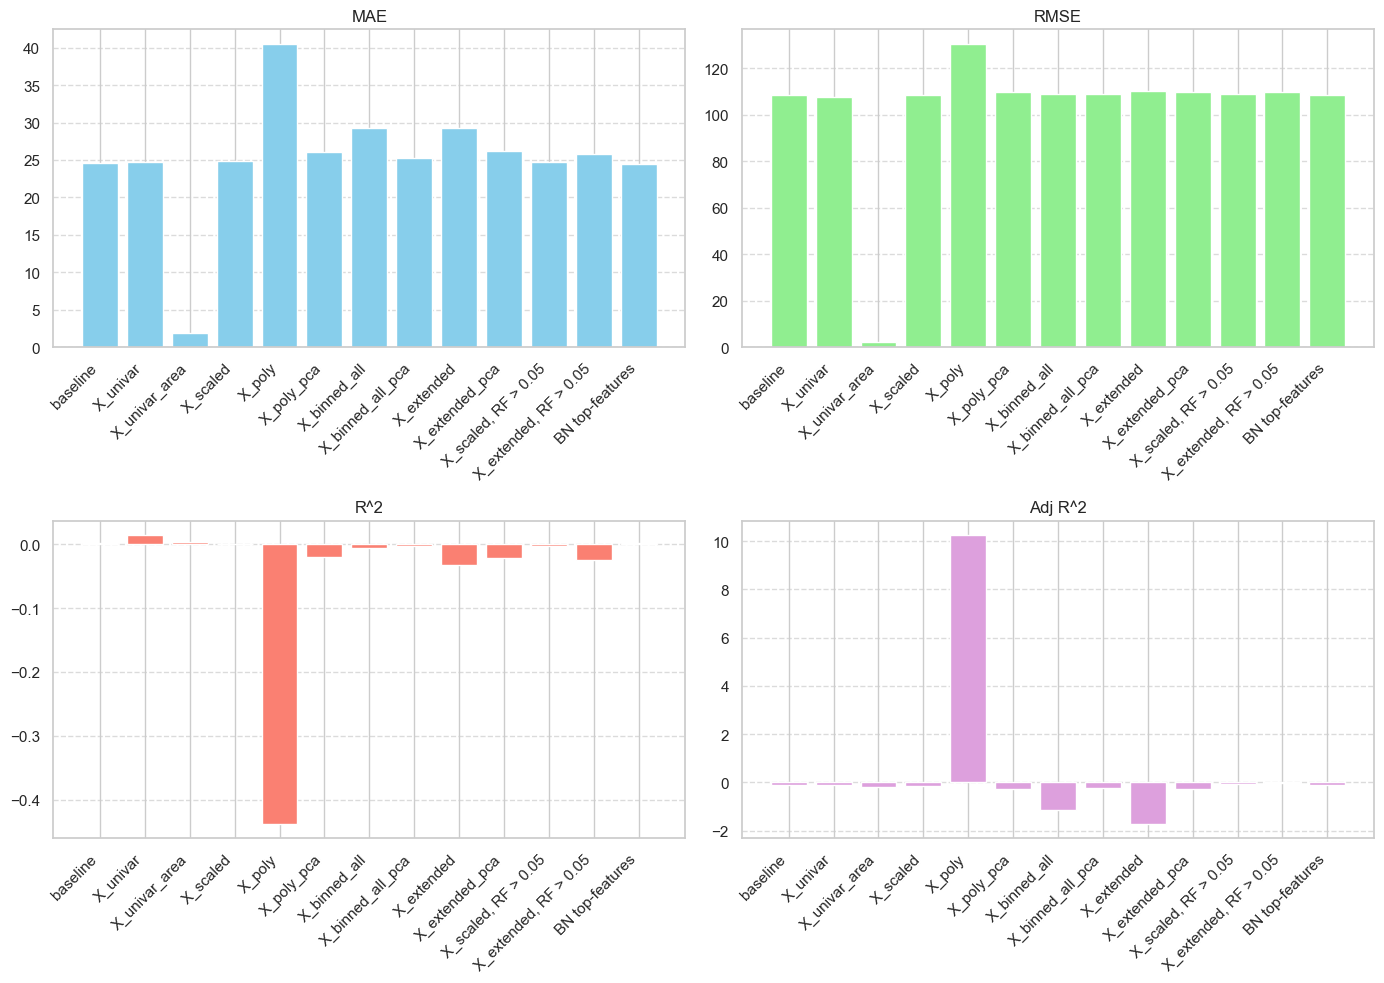

In [21]:
metrics = ['MAE', 'RMSE', 'R^2', 'Adj R^2']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    plt.bar(df_metrics.index, df_metrics[metric], color=colors[i-1])
    plt.title(metric)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

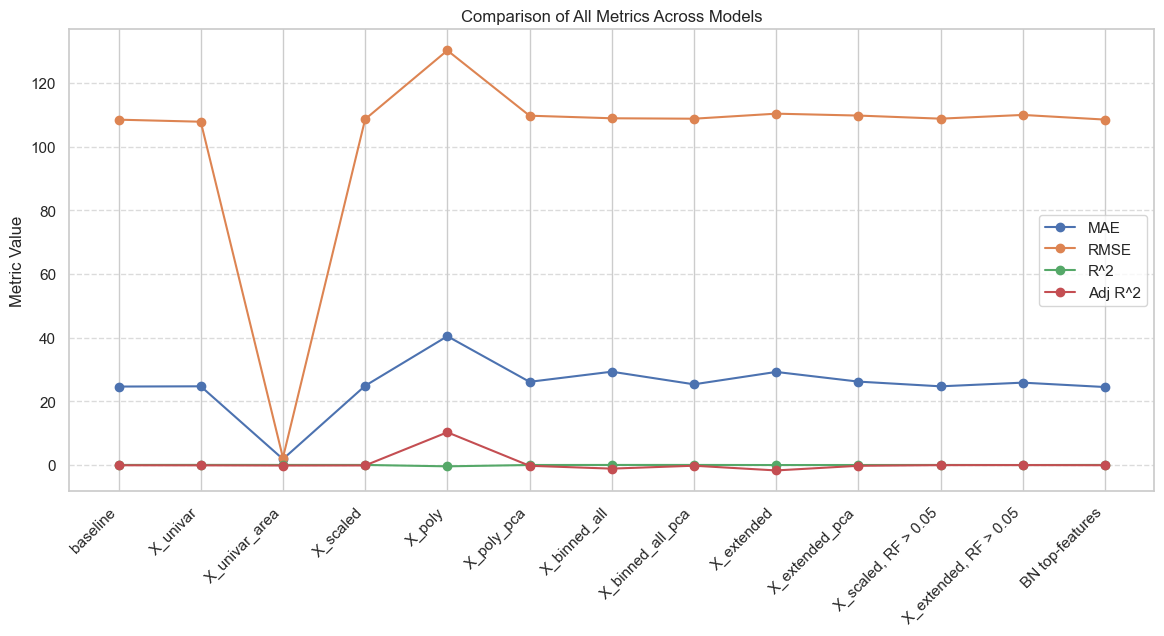

In [22]:
plt.figure(figsize=(14,6))
for metric in metrics:
    plt.plot(df_metrics.index, df_metrics[metric], marker='o', label=metric)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Metric Value')
plt.title('Comparison of All Metrics Across Models')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Списки для хранения метрик
mae_scores_baseline = []
rmse_scores_baseline = []
r2_scores_baseline = []
adj_r2_scores_baseline = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X_baseline):
    X_train, X_test = X_baseline.iloc[train_index], X_baseline.iloc[test_index]
    y_train, y_test = y_baseline.iloc[train_index], y_baseline.iloc[test_index]
    
    # Обучаем модель
    linear_model_baseline.fit(X_train, y_train)
    
    # Предсказания
    y_pred = linear_model_baseline.predict(X_test)
    
    # Считаем метрики
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    n = len(y_test)
    p = X_train.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    # Сохраняем результаты
    mae_scores_baseline.append(mae)
    rmse_scores_baseline.append(rmse)
    r2_scores_baseline.append(r2)
    adj_r2_scores_baseline.append(adj_r2)

# Средние значения по фолдам
print(f"MAE: {np.mean(mae_scores_baseline):.4f} | RMSE: {np.mean(rmse_scores_baseline):.4f} | "
      f"R2: {np.mean(r2_scores_baseline):.4f} | Adj R2: {np.mean(adj_r2_scores_baseline):.4f}")

MAE: 19.9674 | RMSE: 54.6440 | R2: -0.1160 | Adj R2: -0.2368


In [24]:
mae_scores_univar = []
rmse_scores_univar = []
r2_scores_univar = []
adj_r2_scores_univar = []

for train_index, test_index in kf.split(X_univar):
    X_train, X_test = X_univar.iloc[train_index], X_univar.iloc[test_index]
    y_train, y_test = y_univar.iloc[train_index], y_univar.iloc[test_index]

    # Обучаем pipeline
    linear_model_univar.fit(X_train, y_train)
    y_pred = linear_model_univar.predict(X_test)

    # Метрики
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = X_train.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Сохраняем
    mae_scores_univar.append(mae)
    rmse_scores_univar.append(rmse)
    r2_scores_univar.append(r2)
    adj_r2_scores_univar.append(adj_r2)

# Средние по фолдам
print(f"MAE: {np.mean(mae_scores_univar):.4f} | RMSE: {np.mean(rmse_scores_univar):.4f} | "
      f"R2: {np.mean(r2_scores_univar):.4f} | Adj R2: {np.mean(adj_r2_scores_univar):.4f}")

MAE: 21.7144 | RMSE: 55.5456 | R2: -0.1836 | Adj R2: -0.3558


In [25]:
mae_scores_univar_area = []
rmse_scores_univar_area = []
r2_scores_univar_area = []
adj_r2_scores_univar_area = []

for train_index, test_index in kf.split(X_univar_area):
    X_train, X_test = X_univar_area.iloc[train_index], X_univar_area.iloc[test_index]
    y_train, y_test = y_univar_area.iloc[train_index], y_univar_area.iloc[test_index]

    # Обучаем pipeline
    linear_model_univar_area.fit(X_train, y_train)
    y_pred = linear_model_univar_area.predict(X_test)

    # Метрики
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = X_train.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Сохраняем
    mae_scores_univar_area.append(mae)
    rmse_scores_univar_area.append(rmse)
    r2_scores_univar_area.append(r2)
    adj_r2_scores_univar_area.append(adj_r2)

# Средние по фолдам
print(f"MAE: {np.mean(mae_scores_univar_area):.4f} | RMSE: {np.mean(rmse_scores_univar_area):.4f} | "
      f"R2: {np.mean(r2_scores_univar_area):.4f} | Adj R2: {np.mean(adj_r2_scores_univar_area):.4f}")

MAE: 1.9126 | RMSE: 2.4968 | R2: -0.0228 | Adj R2: -0.2128


In [26]:
mae_scores_bn = []
rmse_scores_bn = []
r2_scores_bn = []
adj_r2_scores_bn = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X_bn):
    X_train, X_test = X_bn.iloc[train_index], X_bn.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    linear = sklearn.linear_model.LinearRegression()
    linear.fit(X_train, y_train)
    
    y_pred = linear.predict(X_test)
        
    # Считаем метрики
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    n = len(y_test)
    p = X_train.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    # Сохраняем результаты
    mae_scores_bn.append(mae)
    rmse_scores_bn.append(rmse)
    r2_scores_bn.append(r2)
    adj_r2_scores_bn.append(adj_r2)

# Средние значения по фолдам
print(f"MAE: {np.mean(mae_scores_bn):.4f} | RMSE: {np.mean(rmse_scores_bn):.4f} | "
      f"R2: {np.mean(r2_scores_bn):.4f} | Adj R2: {np.mean(adj_r2_scores_bn):.4f}")

MAE: 19.9864 | RMSE: 54.2864 | R2: -0.0789 | Adj R2: -0.1829


In [27]:
mae_scores_rf_features = []
rmse_scores_rf_features = []
r2_scores_rf_features = []
adj_r2_scores_rf_features = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X_rf_features):
    X_train, X_test = X_rf_features.iloc[train_index], X_rf_features.iloc[test_index]
    y_train, y_test = y_baseline.iloc[train_index], y_baseline.iloc[test_index]
    
    linear = sklearn.linear_model.LinearRegression()
    linear.fit(X_train, y_train)
    
    y_pred = linear.predict(X_test)
        
    # Считаем метрики
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    n = len(y_test)
    p = X_train.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    # Сохраняем результаты
    mae_scores_rf_features.append(mae)
    rmse_scores_rf_features.append(rmse)
    r2_scores_rf_features.append(r2)
    adj_r2_scores_rf_features.append(adj_r2)

# Средние значения по фолдам
print(f"MAE: {np.mean(mae_scores_rf_features):.4f} | RMSE: {np.mean(rmse_scores_rf_features):.4f} | "
      f"R2: {np.mean(r2_scores_rf_features):.4f} | Adj R2: {np.mean(adj_r2_scores_rf_features):.4f}")

MAE: 20.0261 | RMSE: 54.5182 | R2: -0.0793 | Adj R2: -0.1465


In [28]:

from scipy.stats import friedmanchisquare, wilcoxon, ttest_rel

In [29]:
friedman_stat, friedman_p = friedmanchisquare(mae_scores_baseline, mae_scores_univar, mae_scores_bn, mae_scores_rf_features)
print(f'Friedman Chi-Square Statistic: {friedman_stat:.4f}')
print(f'p-value: {friedman_p:.4f}')

Friedman Chi-Square Statistic: 10.6800
p-value: 0.0136


In [30]:
friedman_stat, friedman_p = friedmanchisquare(rmse_scores_baseline, rmse_scores_univar, rmse_scores_bn, rmse_scores_rf_features)
print(f'Friedman Chi-Square Statistic: {friedman_stat:.4f}')
print(f'p-value: {friedman_p:.4f}')

Friedman Chi-Square Statistic: 3.2400
p-value: 0.3561


In [31]:
friedman_stat, friedman_p = friedmanchisquare(r2_scores_baseline, r2_scores_univar, r2_scores_bn, r2_scores_rf_features)
print(f'Friedman Chi-Square Statistic: {friedman_stat:.4f}')
print(f'p-value: {friedman_p:.4f}')

Friedman Chi-Square Statistic: 3.2400
p-value: 0.3561


In [32]:
friedman_stat, friedman_p = friedmanchisquare(r2_scores_baseline, r2_scores_univar, r2_scores_bn, r2_scores_rf_features)
print(f'Friedman Chi-Square Statistic: {friedman_stat:.4f}')
print(f'p-value: {friedman_p:.4f}')

Friedman Chi-Square Statistic: 3.2400
p-value: 0.3561


In [33]:
mae_dict = pd.DataFrame({
    'Baseline': mae_scores_baseline,
    'Univariate': mae_scores_univar,
    'Ext, RF>0.05': mae_scores_bn,
    'BN': mae_scores_rf_features
})

In [34]:
#pip install scikit-posthocs

In [35]:
import scikit_posthocs as sp
nemenyi_results = sp.posthoc_nemenyi_friedman(mae_dict)
nemenyi_results

ModuleNotFoundError: No module named 'scikit_posthocs'

In [36]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(mae_scores_baseline, mae_scores_univar)
print('Baseline vs Univariate')
print(f'Statistic: {stat}, p-value: {p}')
print()

stat, p = wilcoxon(mae_scores_baseline, mae_scores_bn)
print('Baseline vs BN')
print(f'Statistic: {stat}, p-value: {p}')
print()

stat, p = wilcoxon(mae_scores_baseline, mae_scores_rf_features)
print('Baseline vs Ext, RF>0.05')
print(f'Statistic: {stat}, p-value: {p}')
print()

stat, p = wilcoxon(mae_scores_univar, mae_scores_bn)
print('Univariate vs BN')
print(f'Statistic: {stat}, p-value: {p}')
print()

stat, p = wilcoxon(mae_scores_univar, mae_scores_rf_features)
print('Univariate vs Ext, RF>0.05')
print(f'Statistic: {stat}, p-value: {p}')
print()

stat, p = wilcoxon(mae_scores_bn, mae_scores_rf_features)
print('BN vs Ext, RF>0.05')
print(f'Statistic: {stat}, p-value: {p}')
print()

Baseline vs Univariate
Statistic: 0.0, p-value: 0.0625

Baseline vs BN
Statistic: 7.0, p-value: 1.0

Baseline vs Ext, RF>0.05
Statistic: 5.0, p-value: 0.625

Univariate vs BN
Statistic: 0.0, p-value: 0.0625

Univariate vs Ext, RF>0.05
Statistic: 0.0, p-value: 0.0625

BN vs Ext, RF>0.05
Statistic: 5.0, p-value: 0.625



In [37]:
from scipy.stats import ttest_rel

# Baseline vs Univariate
stat, p = ttest_rel(mae_scores_baseline, mae_scores_univar)
print('Baseline vs Univariate')
print(f'Statistic: {stat}, p-value: {p}\n')

# Baseline vs BN
stat, p = ttest_rel(mae_scores_baseline, mae_scores_bn)
print('Baseline vs BN')
print(f'Statistic: {stat}, p-value: {p}\n')

# Baseline vs Ext, RF>0.05
stat, p = ttest_rel(mae_scores_baseline, mae_scores_rf_features)
print('Baseline vs Ext, RF>0.05')
print(f'Statistic: {stat}, p-value: {p}\n')

# Univariate vs BN
stat, p = ttest_rel(mae_scores_univar, mae_scores_bn)
print('Univariate vs BN')
print(f'Statistic: {stat}, p-value: {p}\n')

# Univariate vs Ext, RF>0.05
stat, p = ttest_rel(mae_scores_univar, mae_scores_rf_features)
print('Univariate vs Ext, RF>0.05')
print(f'Statistic: {stat}, p-value: {p}\n')

# BN vs Ext, RF>0.05
stat, p = ttest_rel(mae_scores_bn, mae_scores_rf_features)
print('BN vs Ext, RF>0.05')
print(f'Statistic: {stat}, p-value: {p}\n')


Baseline vs Univariate
Statistic: -2.9501961515491857, p-value: 0.04196117554409973

Baseline vs BN
Statistic: -0.1560128666331571, p-value: 0.8835799203900553

Baseline vs Ext, RF>0.05
Statistic: -0.12255719601240508, p-value: 0.9083686049747071

Univariate vs BN
Statistic: 3.322792903039052, p-value: 0.02930201668625428

Univariate vs Ext, RF>0.05
Statistic: 3.1986030957430645, p-value: 0.032944657996286486

BN vs Ext, RF>0.05
Statistic: -0.08351059078516859, p-value: 0.9374578913204672



Baseline vs Univariate: p = 0.042 -- significant difference.

t < 0 =>  MAE of Univariate is lower than Baseline.  Univariate performs better.



Univariate vs BN: p = 0.029 -- significant difference.

t > 0 => MAE of Univariate is higher than BN. BN performs better.



Univariate vs Ext, RF>0.05: p = 0.033 -- significant difference.

t > 0 => MAE of Univariate is higher than Ext, RF>0.05. Ext, RF>0.05 performs better.



All other pairs:

p > 0.05 -- no statistically significant difference.

# Tasks 3-4

In [38]:
# сравнивааем linear_model_univar и bn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, log_loss, accuracy_score
import statsmodels.api as sm
from scipy.stats import ttest_rel, wilcoxon
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [50]:

# Блок 3: Настройка CV и кандидатов моделей
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=0)

models = {
    'UnivarLinearRegression': (LinearRegression(), X_univar_area, y_univar_area, kf),
    'BNLinearRegression': (LinearRegression(), X_bn, y, kf)
}

# Блок 4: Функции для CV и метрик
def cv_metrics_regression(model, X, y, kf):
    metrics = []
    preds = []
    for train_idx, test_idx in kf.split(X):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        yhat = pd.Series(np.squeeze(model.predict(X.iloc[test_idx])), index=test_idx)
        rmse = np.sqrt(mean_squared_error(y.iloc[test_idx], yhat))
        r2 = r2_score(y.iloc[test_idx], yhat)
        metrics.append({'rmse': rmse, 'r2': r2})
        preds.append((test_idx, yhat))
    return pd.DataFrame(metrics), preds


# 1) Кодируем категориальные признаки для полного X и для каждого X в models
def encode_df(df):
    # если df — Series, превращаем в DataFrame
    if isinstance(df, pd.Series):
        df = df.to_frame()
    # detect object/category cols
    cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
    if len(cat_cols) == 0:
        return df.copy()
    df_enc = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    return df_enc


X = pd.read_csv('forestfires.csv').drop(columns='area')
# Закодированный полный X (используется для OLS full)
X_enc = encode_df(X)

BIC OLS full: {'bic': 5905.401239750568, 'llf': -2868.35204106942, 'k': 28}
BIC OLS uni : {'bic': 2084.0880931677216, 'llf': -954.4603532703384, 'k': 29}
BF (uni over full) ≈ inf
Интерпретация BF: Очень сильная поддержка модели 1 (Uni)
BNLinearRegression: t_p=0.0357, wilcoxon_p=0.0625


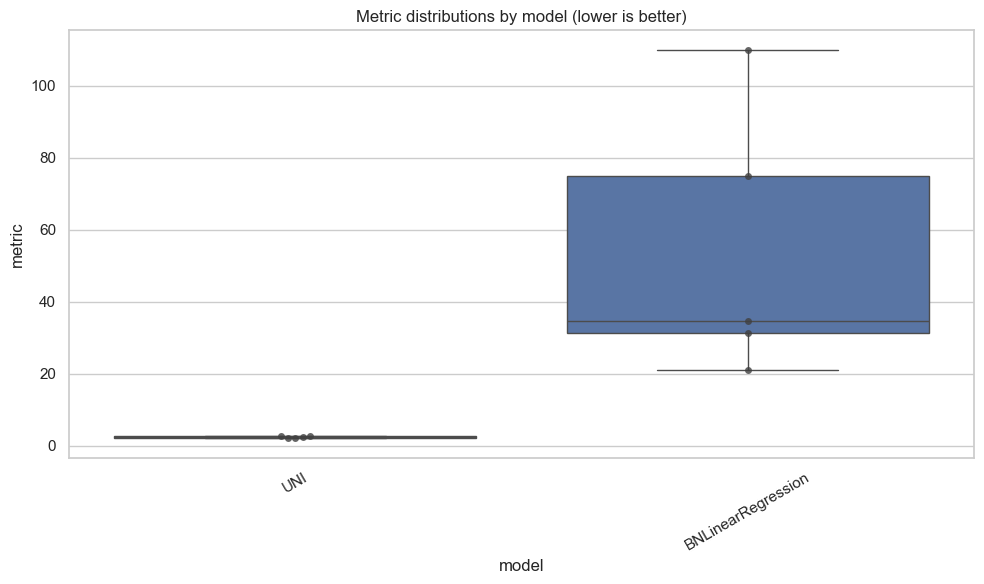

,model,mean_metric,std_metric,bic
0,UNI,2.496523,0.302795,2084.088093
1,BNLinearRegression,54.362738,37.189294,5905.401240


INTRODUCTION

Data shape: X=(517, 12), y=(517, 1)


PERFORMANCE SUMMARY

             model  mean_metric  std_metric         bic
               UNI     2.496523    0.302795 2084.088093
BNLinearRegression    54.362738   37.189294 5905.401240


BIC values:

OLS_full: bic=5905.401239750568, llf=-2868.35204106942

OLS_uni: bic=2084.0880931677216, llf=-954.4603532703384


Bayes Factor (uni over full) ≈ inf (Очень сильная поддержка модели 1 (Uni))


STATISTICAL TESTS

Hypotheses (two-sided) for each comparison:

  H0: mean(rmse_UNI) == mean(rmse_MULTI)

  H1: mean(rmse_UNI) != mean(rmse_MULTI)


Test results (alpha=0.05):

UNI vs BNLinearRegression: t_p=0.03565249179550464, wilcoxon_p=0.0625, t_decision=reject H0, w_decision=fail to reject H0


CONCLUSION

Choose model balancing predictive performance, p-values and Bayes Factor (BIC-based).


In [ ]:
# 1) Кодируем категориальные признаки для полного X и для каждого X в models
def encode_df(df):
    # если df — Series, превращаем в DataFrame
    if isinstance(df, pd.Series):
        df = df.to_frame()
    # detect object/category cols
    cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
    if len(cat_cols) == 0:
        return df.copy()
    df_enc = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    return df_enc

X = pd.read_csv('forestfires.csv').drop(columns='area')
# Закодированный полный X (используется для OLS full)
X_enc = encode_df(X)

# Кодируем X внутри models и подготовим структуру для результатов CV
multi_metrics = {}
for name, params in models.items():
    model_obj, X_i, y_i, kf_i = params
    X_i_enc = encode_df(X_i)
    # Сохраняем обратно закодированный X в params (не обязательно, но удобно)
    multi_metrics[name] = {'model': model_obj, 'X': X_i_enc, 'y': y_i, 'kf': kf_i}

# 2) Прогоняем CV для каждой модели и сохраняем метрики/предсказания
for name, entry in multi_metrics.items():
    model_obj = entry['model']
    X_i = entry['X']
    y_i = entry['y']
    kf_i = entry['kf']
    # Запуск CV: ожидается, что cv_metrics_regression вернёт DataFrame с колонками, например, ['rmse','r2']
    metrics_df, preds = cv_metrics_regression(model_obj, X_i, y_i, kf_i)
    entry['metrics'] = metrics_df.reset_index(drop=True)
    entry['preds'] = preds

# 3) BIC через statsmodels: full и uni (берём uni из models['UnivarLinearRegression'])
bic_dict = {}

# full OLS на X_enc (совместимо с statsmodels)
# Найти строковые колонки
obj_cols = X_enc.select_dtypes(include=['object','category']).columns.tolist()
# # Преобразовать в категории и заменить на integer коды
for c in obj_cols:    
    X_enc[c] = X_enc[c].astype('category')      
    X_enc[c] = X_enc[c].cat.codes.replace(-1, np.nan)  # ставим NaN для пропусков# Опционально: заполнить NaN (например 0) или оставить и удалить/импутировать строки
X_enc = X_enc.fillna(0)   # или используйте более аккуратную импутацию# Привести к числовому типу и запустить OLS
X_enc = X_enc.apply(pd.to_numeric, errors='coerce').fillna(0)
X_full_sm = sm.add_constant(X_enc, has_constant='add')
ols_full = sm.OLS(y, X_enc.astype(float)).fit()
bic_dict['OLS_full'] = {'bic': float(ols_full.bic), 'llf': float(ols_full.llf), 'k': int(ols_full.df_model + 1)}

# univar: ищем запись в multi_metrics
if 'UnivarLinearRegression' not in multi_metrics:
    raise ValueError("Не найдена 'UnivarLinearRegression' в models")
uni_entry = multi_metrics['UnivarLinearRegression']
X_uni_enc = uni_entry['X']
y_uni = uni_entry['y']
# Если X_uni_enc имеет >1 колонок (например dummy добавил несколько), OLS всё равно сработает
X_uni_sm = sm.add_constant(X_uni_enc, has_constant='add')
ols_uni = sm.OLS(y_uni, X_uni_sm.astype(float)).fit()
bic_dict['OLS_uni'] = {'bic': float(ols_uni.bic), 'llf': float(ols_uni.llf), 'k': int(ols_uni.df_model + 1)}

print("BIC OLS full:", bic_dict['OLS_full'])
print("BIC OLS uni :", bic_dict['OLS_uni'])

# 4) Bayes Factor (прибл. через разницу BIC)
def bayes_factor_from_bic(bic1, bic2):
    # BF_{1 over 2} ≈ exp((BIC2 - BIC1)/2)
    return np.exp((bic2 - bic1) / 2.0)

bf_val = bayes_factor_from_bic(bic_dict['OLS_uni']['bic'], bic_dict['OLS_full']['bic'])
print(f"BF (uni over full) ≈ {bf_val:.3g}")

def interpret_bf(bf):
    if bf < 1/100: return "Очень сильная поддержка модели 2 (Full)"
    if bf < 1/10:  return "Сильная поддержка модели 2 (Full)"
    if bf < 1/3:   return "Умеренная поддержка модели 2 (Full)"
    if bf < 1:     return "Слабая поддержка модели 2 (Full)"
    if bf == 1:    return "Нет различий"
    if bf <= 3:    return "Слабая поддержка модели 1 (Uni)"
    if bf <= 10:   return "Умеренная поддержка модели 1 (Uni)"
    if bf <= 30:   return "Сильная поддержка модели 1 (Uni)"
    return "Очень сильная поддержка модели 1 (Uni)"

print("Интерпретация BF:", interpret_bf(bf_val))

# 5) Парные статистические тесты (UNI vs каждый MULTI) по CV-метрике 'rmse'
stat_tests_results = []
metric_name = 'rmse'
alpha = 0.05

if 'metrics' not in uni_entry:
    raise ValueError("UNI entry has no 'metrics' — убедитесь, что cv_metrics_regression вернула метрики")
if metric_name not in uni_entry['metrics'].columns:
    raise ValueError(f"UNI metrics must contain '{metric_name}' column")

uni_vec = uni_entry['metrics'][metric_name].values

for name, entry in multi_metrics.items():
    if name == 'UnivarLinearRegression':
        continue
    if 'metrics' not in entry:
        print(f"Skipping {name}: no metrics")
        continue
    multi_df = entry['metrics']
    if metric_name not in multi_df.columns:
        print(f"Skipping {name}: no '{metric_name}'")
        continue
    multi_vec = multi_df[metric_name].values

    # Ensure equal length: if CV folds differ, align by min length
    L = min(len(uni_vec), len(multi_vec))
    u = uni_vec[:L]
    m = multi_vec[:L]

    try:
        t_stat, t_p = ttest_rel(u, m)
    except Exception:
        t_stat, t_p = (np.nan, np.nan)
    try:
        w_stat, w_p = wilcoxon(u, m)
    except Exception:
        w_stat, w_p = (np.nan, np.nan)

    t_decision = 'reject H0' if (not np.isnan(t_p) and t_p < alpha) else 'fail to reject H0'
    w_decision = 'reject H0' if (not np.isnan(w_p) and w_p < alpha) else 'fail to reject H0'

    stat_tests_results.append({
        'pair': f'UNI vs {name}',
        'metric': metric_name,
        't_stat': float(t_stat) if not np.isnan(t_stat) else None,
        't_p': float(t_p) if not np.isnan(t_p) else None,
        't_decision': t_decision,
        'w_stat': float(w_stat) if not np.isnan(w_stat) else None,
        'w_p': float(w_p) if not np.isnan(w_p) else None,
        'w_decision': w_decision
    })
    print(f"{name}: t_p={t_p:.4f}, wilcoxon_p={w_p}")

# 6) Визуализация распределений метрик (boxplot + swarm)
plot_rows = []
for i, val in enumerate(uni_vec):
    plot_rows.append({'model': 'UNI', 'fold': i, 'metric': val})
for name, entry in multi_metrics.items():
    if name == 'UnivarLinearRegression': continue
    vec = entry['metrics'][metric_name].values
    for i, val in enumerate(vec):
        plot_rows.append({'model': name, 'fold': i, 'metric': val})
plot_df = pd.DataFrame(plot_rows)

plt.figure(figsize=(10,6))
sns.boxplot(x='model', y='metric', data=plot_df)
sns.swarmplot(x='model', y='metric', data=plot_df, color='0.25', alpha=0.8)
plt.title('Metric distributions by model (lower is better)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 7) Таблица сравнения (mean ± std), BIC и BF где применимо
rows = []
rows.append({
    'model': 'UNI',
    'mean_metric': float(np.mean(uni_vec)),
    'std_metric': float(np.std(uni_vec, ddof=1)),
    'bic': bic_dict.get('OLS_uni', {}).get('bic', np.nan)
})
for name, entry in multi_metrics.items():
    if name == 'UnivarLinearRegression': continue
    vec = entry['metrics'][metric_name].values
    rows.append({
        'model': name,
        'mean_metric': float(np.mean(vec)),
        'std_metric': float(np.std(vec, ddof=1)),
        'bic': bic_dict.get('OLS_full', {}).get('bic', np.nan)
    })
comp_df = pd.DataFrame(rows).sort_values('mean_metric')
display(comp_df)

# 8) Краткий автоматический отчёт (строки, которые можно сохранить в файл)
report = []
report.append("INTRODUCTION")
report.append(f"Data shape: X={X.shape}, y={y.shape}")
report.append("\nPERFORMANCE SUMMARY")
report.append(comp_df.to_string(index=False))

report.append("\nBIC values:")
for k, v in bic_dict.items():
    report.append(f"{k}: bic={v['bic']}, llf={v['llf']}")
report.append(f"\nBayes Factor (uni over full) ≈ {bf_val:.3g} ({interpret_bf(bf_val)})")

report.append("\nSTATISTICAL TESTS")
report.append("Hypotheses (two-sided) for each comparison:")
report.append("  H0: mean(rmse_UNI) == mean(rmse_MULTI)")
report.append("  H1: mean(rmse_UNI) != mean(rmse_MULTI)")
report.append("\nTest results (alpha=0.05):")
for r in stat_tests_results:
    report.append(f"{r['pair']}: t_p={r['t_p']}, wilcoxon_p={r['w_p']}, t_decision={r['t_decision']}, w_decision={r['w_decision']}")

print("\n\n".join(report))

# -----------------------------------------------------------------